In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# import utils
import sys
sys.path.append('../../../utils')
import calibrate, simulate, misc

In [6]:
# df = pd.read_csv("../../../../datasets/TrueFX/EURUSD-2024-02/EURUSD-2024-02.csv", header=None)
# df.columns = ['Pair', 'TimeStamp', 'Bid', 'Ask']
# df['Timestamp'] = pd.to_datetime(df['TimeStamp']) - pd.Timedelta(hours=5) # turn GMT to EST time
# df = df[['Timestamp', 'Bid', 'Ask']]

# df['Date'] = df['Timestamp'].dt.date
# df['Time'] = df['Timestamp'].dt.time
# df['Hour'] = df['Timestamp'].dt.hour
# df['Minute'] = df['Timestamp'].dt.minute
# df['Second'] = df['Timestamp'].dt.second

# df['Mid'] = (df['Bid'] + df['Ask']) / 2

# chosen_date = pd.to_datetime('2024-02-01').date()
# sub_df = df[df['Date'] == chosen_date]
# sub_df.plot(x='Timestamp', y=['Bid', 'Ask'], xlabel="Time", ylabel="Price", title="Bid and Ask prices for EURUSD on {}".format(chosen_date), figsize=(12, 6))
# plt.show()

# first_hour = sub_df[sub_df['Hour'] == 0]
# first_hour.plot(x='Timestamp', y=['Mid'], xlabel="Time", ylabel="Price", title="Bid and Ask prices for EURUSD on {}".format(chosen_date), figsize=(12, 6))

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set_theme()

# import utils
import sys
sys.path.append('../../../utils')
import calibrate, simulate, misc
from scipy.optimize import curve_fit

first_hour = pd.read_csv("EURUSD_2024-02-01-first-hour.csv")
# turn index to datetime
first_hour['Timestamp'] = pd.to_datetime(first_hour['Timestamp'])

In [24]:
ts = pd.Series(first_hour['Mid'].values, index=first_hour['Timestamp'])
taus = misc.range_timedelta(100, 20000, 100, 'ms')
C_emp_values = [misc.C_emp(ts, tau) for tau in taus]
# C_emp_values = [C_emp_values[i]/C_emp_values[0] for i in range(len(C_emp_values))] # makes mu bigger
theta_hat = misc.curve_calibrate(taus, C_emp_values)

print(f'Estimated theta: {theta_hat}')

C_th_func = misc.C_th(theta_hat)
C_th_values = [C_th_func(tau.total_seconds()) for tau in taus]

Estimated theta: [1.85531139e-11 2.47633469e+00 3.21266254e+00]


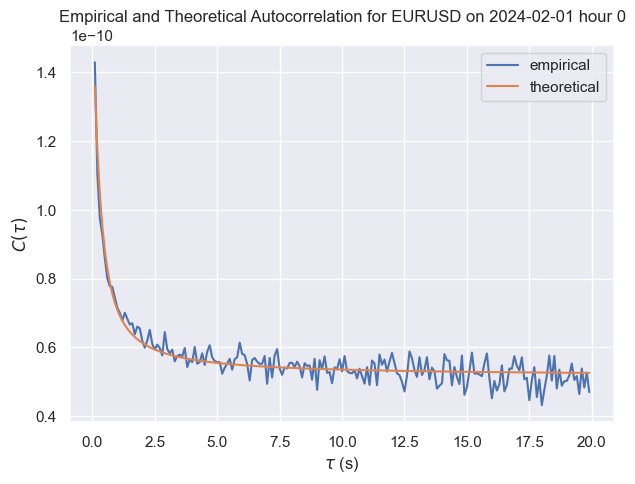

In [25]:
plt.figure()
plt.plot(taus.dt.total_seconds(), C_emp_values, label='empirical')
plt.plot(taus.dt.total_seconds(), C_th_values, label='theoretical')
plt.xlabel(r'$\tau$ (s)')
plt.ylabel(r'$C(\tau)$')
plt.legend()
plt.tight_layout()
plt.title(f'Empirical and Theoretical Autocorrelation for EURUSD on 2024-02-01 hour 0')
plt.show()

In [21]:
cal = calibrate.HawkesCalibrator

0.18711991267737407

In [15]:
theta_hat

array([1.85531139e-11, 2.47633469e+00, 3.21266254e+00])